### 四、建模与调参

此部分为零基础入门金融风控的 Task4 建模调参部分，带你来了解各种模型以及模型的评价和调参策略，欢迎大家后续多多交流。

赛题：零基础入门数据挖掘 - 零基础入门金融风控之贷款违约预测

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction


<br>

#### 4.1 学习目标

- 学习在金融分控领域常用的机器学习模型
- 学习机器学习模型的建模过程与调参流程
- 完成相应学习打卡任务 

<br>

#### 4.2 内容介绍

- 逻辑回归模型：

  - 理解逻辑回归模型；
  - 逻辑回归模型的应用；
  - 逻辑回归的优缺点；

- 树模型：

  - 理解树模型；
  - 树模型的应用；
  - 树模型的优缺点；

- 集成模型

  - 基于bagging思想的集成模型
    - 随机森林模型
  - 基于boosting思想的集成模型
    - XGBoost模型
    - LightGBM模型
    - CatBoost模型

- 模型对比与性能评估：

  - 回归模型/树模型/集成模型；
  - 模型评估方法；
  - 模型评价结果；

- 模型调参：

  - 贪心调参方法；

  - 网格调参方法；

  - 贝叶斯调参方法； 

    
<br>

#### 4.3 模型相关原理介绍

由于相关算法原理篇幅较长，本文推荐了一些博客与教材供初学者们进行学习。

##### 4.3.1 逻辑回归模型

https://blog.csdn.net/han_xiaoyang/article/details/49123419

##### 4.3.2 决策树模型

https://blog.csdn.net/c406495762/article/details/76262487

##### 4.3.3 GBDT模型

https://zhuanlan.zhihu.com/p/45145899

##### 4.3.4 XGBoost模型

https://blog.csdn.net/wuzhongqiang/article/details/104854890

##### 4.3.5 LightGBM模型

https://blog.csdn.net/wuzhongqiang/article/details/105350579

##### 4.3.6 Catboost模型

https://mp.weixin.qq.com/s/xloTLr5NJBgBspMQtxPoFA

##### 4.3.7 时间序列模型(选学)

RNN：https://zhuanlan.zhihu.com/p/45289691

LSTM：https://zhuanlan.zhihu.com/p/83496936

##### 4.3.8 推荐教材：

《机器学习》 https://book.douban.com/subject/26708119/

《统计学习方法》 https://book.douban.com/subject/10590856/

《面向机器学习的特征工程》 https://book.douban.com/subject/26826639/

《信用评分模型技术与应用》https://book.douban.com/subject/1488075/

《数据化风控》https://book.douban.com/subject/30282558/ 


<br>

#### 4.4 模型对比与性能评估

##### 4.4.1 逻辑回归

- 优点

  - 训练速度较快，分类的时候，计算量仅仅只和特征的数目相关；
  - 简单易理解，模型的可解释性非常好，从特征的权重可以看到不同的特征对最后结果的影响；
  - 适合二分类问题，不需要缩放输入特征；
  - 内存资源占用小，只需要存储各个维度的特征值；

- 缺点

  - **逻辑回归需要预先处理缺失值和异常值【可参考task3特征工程】；**

  - 不能用Logistic回归去解决非线性问题，因为Logistic的决策面是线性的；

  - 对多重共线性数据较为敏感，且很难处理数据不平衡的问题；

  - 准确率并不是很高，因为形式非常简单，很难去拟合数据的真实分布； 

    
<br>

##### 4.4.2 决策树模型

- 优点

  - 简单直观，生成的决策树可以可视化展示
  - **数据不需要预处理，不需要归一化，不需要处理缺失数据**
  - 既可以处理离散值，也可以处理连续值

- 缺点

  - 决策树算法非常容易过拟合，导致泛化能力不强（可进行适当的剪枝）
  - 采用的是贪心算法，容易得到局部最优解

  
<br>

##### 4.4.3 集成模型集成方法（ensemble method）

通过组合多个学习器来完成学习任务，通过集成方法，可以将多个弱学习器组合成一个强分类器，因此集成学习的泛化能力一般比单一分类器要好。

集成方法主要包括Bagging和Boosting，Bagging和Boosting都是将已有的分类或回归算法通过一定方式组合起来，形成一个更加强大的分类。两种方法都是把若干个分类器整合为一个分类器的方法，只是整合的方式不一样，最终得到不一样的效果。常见的基于Baggin思想的集成模型有：随机森林、基于Boosting思想的集成模型有：Adaboost、GBDT、XgBoost、LightGBM等。 

**Baggin和Boosting的区别总结如下：**

- **样本选择上：** Bagging方法的训练集是从原始集中有放回的选取，所以从原始集中选出的各轮训练集之间是独立的；而Boosting方法需要每一轮的训练集不变，只是训练集中每个样本在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整
- **样例权重上：** Bagging方法使用均匀取样，所以每个样本的权重相等；而Boosting方法根据错误率不断调整样本的权值，错误率越大则权重越大
- **预测函数上：** Bagging方法中所有预测函数的权重相等；而Boosting方法中每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重
- **并行计算上：** Bagging方法中各个预测函数可以并行生成；而Boosting方法各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。 


<br>

##### 4.4.4 模型评估方法

对于模型来说，其在训练集上面的误差我们称之为**训练误差**或者**经验误差**，而在测试集上的误差称之为**测试误差**。

对于我们来说，我们更关心的是模型对于新样本的学习能力，即我们希望通过对已有样本的学习，尽可能的将所有潜在样本的普遍规律学到手，而如果模型对训练样本学的太好，则有可能把训练样本自身所具有的一些特点当做所有潜在样本的普遍特点，这时候我们就会出现**过拟合**的问题。

因此我们通常将已有的数据集划分为训练集和测试集两部分，其中训练集用来训练模型，而测试集则是用来评估模型对于新样本的判别能力。

**对于数据集的划分，我们通常要保证满足以下两个条件：**

- 训练集和测试集的分布要与样本真实分布一致，即训练集和测试集都要保证是从样本真实分布中独立同分布采样而得；
- 训练集和测试集要互斥 

**对于数据集的划分有三种方法：留出法，交叉验证法和自助法，下面挨个介绍：**

- **①留出法**

  留出法是直接将数据集D划分为两个互斥的集合，其中一个集合作为训练集S，另一个作为测试集T。需要注意的是在划分的时候要尽可能保证数据分布的一致性，即避免因数据划分过程引入额外的偏差而对最终结果产生影响。为了保证数据分布的一致性，通常我们采用**分层采样**的方式来对数据进行采样。

  **Tips：** 通常，会将数据集D中大约2/3~4/5的样本作为训练集，其余的作为测试集。 

- **②交叉验证法**

  **k折交叉验证**通常将数据集D分为k份，其中k-1份作为训练集，剩余的一份作为测试集，这样就可以获得k组训练/测试集，可以进行k次训练与测试，最终返回的是k个测试结果的均值。交叉验证中数据集的划分依然是依据**分层采样**的方式来进行。

  对于交叉验证法，其k值的选取往往决定了评估结果的稳定性和保真性，**通常k值选取10。**

  当k=1的时候，我们称之为**留一法**

- **③自助法**

  我们每次从数据集D中取一个样本作为训练集中的元素，然后把该样本放回，重复该行为m次，这样我们就可以得到大小为m的训练集，在这里面有的样本重复出现，有的样本则没有出现过，我们把那些没有出现过的样本作为测试集。

  进行这样采样的原因是因为在D中约有36.8%的数据没有在训练集中出现过。留出法与交叉验证法都是使用**分层采样**的方式进行数据采样与划分，而自助法则是使用**有放回重复采样**的方式进行数据采样

**数据集划分总结**

- 对于数据量充足的时候，通常采用**留出法**或者**k折交叉验证法**来进行训练/测试集的划分；
- 对于数据集小且难以有效划分训练/测试集时使用**自助法**；
- 对于数据集小且可有效划分的时候最好使用**留一法**来进行划分，因为这种方法最为准确 


<br>

##### 4.4.5 模型评价标准

对于本次比赛，我们选用auc作为模型评价标准，类似的评价标准还有ks、f1-score等，具体介绍与实现大家可以回顾下task1中的内容。

 **一起来看一下auc到底是什么？**

在逻辑回归里面，对于正负例的界定，通常会设一个阈值，大于阈值的为正类，小于阈值为负类。如果我们减小这个阀值，更多的样本会被识别为正类，提高正类的识别率，但同时也会使得更多的负类被错误识别为正类。为了直观表示这一现象，引入ROC。

根据分类结果计算得到ROC空间中相应的点，连接这些点就形成ROC curve，横坐标为False Positive Rate(FPR：假正率)，纵坐标为True Positive Rate(TPR：真正率)。 一般情况下，这个曲线都应该处于(0,0)和(1,1)连线的上方,如图：

![img](https://raw.githubusercontent.com/double-point/GraphBed/master/machine_learning/logistic_reg/ROC%26AUC.png)

ROC曲线中的四个点：
- 点(0,1)：即FPR=0, TPR=1，意味着FN＝0且FP＝0，将所有的样本都正确分类；
- 点(1,0)：即FPR=1，TPR=0，最差分类器，避开了所有正确答案；
- 点(0,0)：即FPR=TPR=0，FP＝TP＝0，分类器把每个实例都预测为负类；
- 点(1,1)：分类器把每个实例都预测为正类 

总之：ROC曲线越接近左上角，该分类器的性能越好，其泛化性能就越好。而且一般来说，如果ROC是光滑的，那么基本可以判断没有太大的overfitting。

**但是对于两个模型，我们如何判断哪个模型的泛化性能更优呢？这里我们有主要以下两种方法：**

如果模型A的ROC曲线完全包住了模型B的ROC曲线，那么我们就认为模型A要优于模型B；

如果两条曲线有交叉的话，我们就通过比较ROC与X，Y轴所围得曲线的面积来判断，面积越大，模型的性能就越优，**这个面积我们称之为AUC(area under ROC curve)** 



<br>

#### 4.5 代码示例

<br>

##### 4.5.1 导入相关关和相关设置

In [4]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

##### 4.5.2 读取数据
reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间

In [5]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
data = pd.read_csv('dataset/data_for_model.csv')
data = reduce_mem_usage(data)

Memory usage of dataframe is 928000128.00 MB
Memory usage after optimization is: 165006456.00 MB
Decreased by 82.2%


##### 4.5.3 简单建模
> Tips1：金融风控的实际项目多涉及到信用评分，因此需要模型特征具有较好的可解释性，所以目前在实际项目中多还是以逻辑回归作为基础模型。但是在比赛中以得分高低为准，不需要严谨的可解释性，所以大多基于集成算法进行建模。
>
> Tips2：因为逻辑回归的算法特性，需要提前对异常值、缺失值数据进行处理【参考task3部分】
>
> Tips3：基于树模型的算法特性，异常值、缺失值处理可以跳过，但是对于业务较为了解的同学也可以自己对缺失异常值进行处理，效果可能会更优于模型处理的结果。
>
> 注：以下建模的源数据参考baseline进行了相应的特征工程，对于异常缺失值未进行相应的处理操作。

建模之前的预操作

In [7]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证
X_train = data.loc[data['sample']=='train', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
X_test = data.loc[data['sample']=='test', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
y_train = data.loc[data['sample']=='train', 'isDefault']

# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

In [10]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[427]	valid_0's auc: 0.724947


对验证集进行预测

未调参前lightgbm单模型在验证集上的AUC：0.7249469360631181


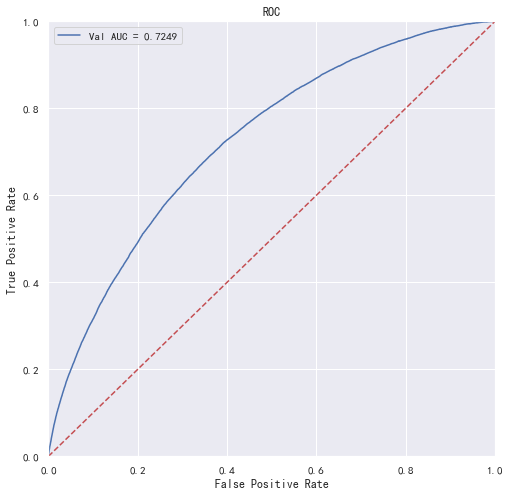

In [11]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

更进一步的，使用5折交叉验证进行模型性能评估

In [12]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
        
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[548]	valid_0's auc: 0.730384
[0.7303837315833632]
************************************ 2 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[643]	valid_0's auc: 0.725869
[0.7303837315833632, 0.7258692125145638]
************************************ 3 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[362]	valid_0's auc: 0.730515
[0.7303837315833632, 0.7258692125145638, 0.7305149209921737]
************************************ 4 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[700]	valid_0's auc: 0.729612
[0.7303837315833632, 0.7258692125145638, 0.7305149209921737, 0.7296117869375041]
************************************ 5 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.729339
Early stopping, best iteration is:
[833]	valid_0's auc: 0.729444
[0.7303837315833632, 0.7258692125145638, 0.7305149209921737, 0.7296117869375041, 0.7294438695369077]
lgb_scotrainre_list:[0.7303837315833632, 0.7258692125145638, 0.7305149209921737, 0.7296117869375041, 0.7294438695369077]
lgb_score_mean:0.7291647043129024
lgb_score_std:0.0016998349834934656


##### 4.5.4 模型调参 

**1. 贪心调参** 

先使用当前对模型影响最大的参数进行调优，达到当前参数下的模型最优化，再使用对模型影响次之的参数进行调优，如此下去，直到所有的参数调整完毕。<br>
这个方法的缺点就是可能会调到局部最优而不是全局最优，但是只需要一步一步的进行参数最优化调试即可，容易理解。<br>
需要注意的是在树模型中参数调整的顺序，也就是各个参数对模型的影响程度，这里列举一下日常调参过程中常用的参数和调参顺序：
- ①：max_depth、num_leaves
- ②：min_data_in_leaf、min_child_weight
- ③：bagging_fraction、 feature_fraction、bagging_freq
- ④：reg_lambda、reg_alpha
- ⑤：min_split_gain


In [ ]:
from sklearn.model_selection import cross_val_score

# 调objective
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_obj[obj] = score
    
# num_leaves
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_leaves[leaves] = score
    
# max_depth
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_depth[depth] = score

"""
可依次将模型的参数通过上面的方式进行调整优化，并且通过可视化观察在每一个最优参数下模型的得分情况
"""

**2. 网格搜索**

sklearn 提供GridSearchCV用于进行网格搜索，只需要把模型的参数输进去，就能给出最优化的结果和参数。相比起贪心调参，网格搜索的结果会更优，但是网格搜索只适合于小数据集，一旦数据的量级上去了，很难得出结果。<br>

同样以Lightgbm算法为例，进行网格搜索调参：

In [20]:
"""通过网格搜索确定最优参数"""
from sklearn.model_selection import GridSearchCV

def get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=31, max_depth=-1, bagging_fraction=1.0, 
                       feature_fraction=1.0, bagging_freq=0, min_data_in_leaf=20, min_child_weight=0.001, 
                       min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=None):
    # 设置5折交叉验证
    cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
    
    model_lgb = lgb.LGBMClassifier(learning_rate=learning_rate,
                                   n_estimators=n_estimators,
                                   num_leaves=num_leaves,
                                   max_depth=max_depth,
                                   bagging_fraction=bagging_fraction,
                                   feature_fraction=feature_fraction,
                                   bagging_freq=bagging_freq,
                                   min_data_in_leaf=min_data_in_leaf,
                                   min_child_weight=min_child_weight,
                                   min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    grid_search = GridSearchCV(estimator=model_lgb, 
                               cv=cv_fold,
                               param_grid=param_grid,
                               scoring='roc_auc'
                              )
    grid_search.fit(X_train, y_train)

    print('模型当前最优参数为:{}'.format(grid_search.best_params_))
    print('模型当前最优得分为:{}'.format(grid_search.best_score_))

In [ ]:
"""以下代码未运行，耗时较长，请谨慎运行，且每一步的最优参数需要在下一步进行手动更新，请注意"""

"""
需要注意一下的是，除了获取上面的获取num_boost_round时候用的是原生的lightgbm（因为要用自带的cv）
下面配合GridSearchCV时必须使用sklearn接口的lightgbm。
"""
"""设置n_estimators 为581，调整num_leaves和max_depth，这里选择先粗调再细调"""
lgb_params = {'num_leaves': range(10, 80, 5), 'max_depth': range(3,10,2)}
get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=None, max_depth=None, min_data_in_leaf=20, 
                   min_child_weight=0.001,bagging_fraction=1.0, feature_fraction=1.0, bagging_freq=0, 
                   min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""num_leaves为30，max_depth为7，进一步细调num_leaves和max_depth"""
lgb_params = {'num_leaves': range(25, 35, 1), 'max_depth': range(5,9,1)}
get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=None, max_depth=None, min_data_in_leaf=20, 
                   min_child_weight=0.001,bagging_fraction=1.0, feature_fraction=1.0, bagging_freq=0, 
                   min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""
确定min_data_in_leaf为45，min_child_weight为0.001 ，下面进行bagging_fraction、feature_fraction和bagging_freq的调参
"""
lgb_params = {'bagging_fraction': [i/10 for i in range(5,10,1)], 
              'feature_fraction': [i/10 for i in range(5,10,1)],
              'bagging_freq': range(0,81,10)
             }
get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
                   min_child_weight=0.001,bagging_fraction=None, feature_fraction=None, bagging_freq=None, 
                   min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""
确定bagging_fraction为0.4、feature_fraction为0.6、bagging_freq为 ，下面进行reg_lambda、reg_alpha的调参
"""
lgb_params = {'reg_lambda': [0,0.001,0.01,0.03,0.08,0.3,0.5], 'reg_alpha': [0,0.001,0.01,0.03,0.08,0.3,0.5]}
get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
                   min_child_weight=0.001,bagging_fraction=0.9, feature_fraction=0.9, bagging_freq=40, 
                   min_split_gain=0, reg_lambda=None, reg_alpha=None, param_grid=lgb_params)

"""
确定reg_lambda、reg_alpha都为0，下面进行min_split_gain的调参
"""
lgb_params = {'min_split_gain': [i/10 for i in range(0,11,1)]}
get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
                   min_child_weight=0.001,bagging_fraction=0.9, feature_fraction=0.9, bagging_freq=40, 
                   min_split_gain=None, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

In [ ]:
"""
参数确定好了以后，我们设置一个比较小的learning_rate 0.005，来确定最终的num_boost_round
"""
# 设置5折交叉验证
# cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
final_params = {
                'boosting_type': 'gbdt',
                'learning_rate': 0.01,
                'num_leaves': 29,
                'max_depth': 7,
                'min_data_in_leaf':45,
                'min_child_weight':0.001,
                'bagging_fraction': 0.9,
                'feature_fraction': 0.9,
                'bagging_freq': 40,
                'min_split_gain': 0,
                'reg_lambda':0,
                'reg_alpha':0,
                'nthread': 6
               }

cv_result = lgb.cv(train_set=lgb_train,
                   early_stopping_rounds=20,
                   num_boost_round=5000,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=final_params,
                   metrics='auc',
                   seed=0,
                  )

print('迭代次数{}'.format(len(cv_result['auc-mean'])))
print('交叉验证的AUC为{}'.format(max(cv_result['auc-mean'])))

在实际调整过程中，可先设置一个较大的学习率（上面的例子中0.1），通过Lgb原生的cv函数进行树个数的确定，之后再通过上面的实例代码进行参数的调整优化。

最后针对最优的参数设置一个较小的学习率（例如0.05），同样通过cv函数确定树的个数，确定最终的参数。

需要注意的是，针对大数据集，上面每一层参数的调整都需要耗费较长时间



**3.贝叶斯调参**

在使用之前需要先安装包bayesian-optimization，运行如下命令即可：
> pip install bayesian-optimization

贝叶斯调参的主要思想是：给定优化的目标函数(广义的函数，只需指定输入和输出即可，无需知道内部结构以及数学性质)，通过不断地添加样本点来更新目标函数的后验分布(高斯过程,直到后验分布基本贴合于真实分布）。简单的说，就是考虑了上一次参数的信息，从而更好的调整当前的参数。

<br>
贝叶斯调参的步骤如下：

- 定义优化函数(rf_cv）
- 建立模型
- 定义待优化的参数
- 得到优化结果，并返回要优化的分数指标

In [13]:
from sklearn.model_selection import cross_val_score

"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', bjective='binary', metric='auc',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    
    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5, scoring='roc_auc').mean()
    
    return val

In [14]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10),
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7263   |  0.7196   |  80.73    |  0.7988   |  19.17    |  5.751    |  40.71    |  0.9548   |  176.2    |  2.939    |  7.212    |
|  2        |  0.7279   |  0.8997   |  74.72    |  0.5904   |  7.259    |  6.175    |  92.03    |  0.4027   |  51.65    |  6.404    |  4.781    |
|  3        |  0.7207   |  0.5133   |  16.53    |  0.9536   |  4.974    |  2.37     |  98.08    |  0.7909   |  52.12    |  4.443    |  4.429    |
|  4        |  0.7276   |  0.6265   |  53.12    |  0.7307   |  10.67    |  1.824    |  18.98    |  0.954    |  60.47    |  6.963    |  1.999    |
|  5        |  0.6963   |  0.6509   |  11.58    |  0.5386   |  11.21    |  7.85     |  11.4     |  0.4269   |  153.0    |  0

In [15]:
"""显示优化结果"""
bayes_lgb.max

{'target': 0.7282530196283977,
 'params': {'bagging_fraction': 0.9815471914843896,
  'bagging_freq': 96.14757648686668,
  'feature_fraction': 0.6961281791730929,
  'max_depth': 19.45450235568963,
  'min_child_weight': 1.6266132496156782,
  'min_data_in_leaf': 37.697878831472295,
  'min_split_gain': 0.4184947943942168,
  'num_leaves': 14.221122487200399,
  'reg_alpha': 7.056502173310882,
  'reg_lambda': 9.924023764203156}}

In [17]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 14,
                    'max_depth': 19,
                    'min_data_in_leaf': 37,
                    'min_child_weight':1.6,
                    'bagging_fraction': 0.98,
                    'feature_fraction': 0.69,
                    'bagging_freq': 96,
                    'reg_lambda': 9,
                    'reg_alpha': 7,
                    'min_split_gain': 0.4,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
}

cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    metrics='auc',
    seed=0
)

print('迭代次数{}'.format(len(cv_result_lgb['auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['auc-mean'])))

迭代次数14269
最终模型的AUC为0.7315032037635779


**模型参数已经确定，建立最终模型并对验证集进行验证**

In [18]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'learning_rate': 0.01,
                'num_leaves': 14,
                'max_depth': 19,
                'min_data_in_leaf': 37,
                'min_child_weight':1.6,
                'bagging_fraction': 0.98,
                'feature_fraction': 0.69,
                'bagging_freq': 96,
                'reg_lambda': 9,
                'reg_alpha': 7,
                'min_split_gain': 0.4,
                'nthread': 8,
                'seed': 2020,
                'silent': True,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=14269, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.724676
[2000]	valid_0's auc: 0.728477
[3000]	valid_0's auc: 0.729863
[4000]	valid_0's auc: 0.730581
[5000]	valid_0's auc: 0.731193
[6000]	valid_0's auc: 0.731638
[7000]	valid_0's auc: 0.731966
[8000]	valid_0's auc: 0.732294
[9000]	valid_0's auc: 0.732471
[10000]	valid_0's auc: 0.732644
[11000]	valid_0's auc: 0.732756
[12000]	valid_0's auc: 0.732911
Early stopping, best iteration is:
[12687]	valid_0's auc: 0.732973
[0.7329726464187137]
************************************ 2 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.721247
[2000]	valid_0's auc: 0.724996
[3000]	valid_0's auc: 0.726328
[4000]	valid_0's auc: 0.727099
[5000]	valid_0's auc: 0.727597
[6000]	valid_0's auc: 0.727968
[7000]	valid_0's auc: 0.728409
[8000]	valid_0's auc: 0.728648
[9000]	valid_0's auc: 0.728889
[10000]	valid_0's auc: 0.729017
[11000]	valid_0's auc: 0.72913
[12000]	valid_0's auc: 0.7293
[13000]	valid_0's auc: 0.729426
Early stopping, best iteration is:
[13014]	valid_0's auc: 0.729429
[0.7329726464187137, 0.7294292852806246]
************************************ 3 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.725542
[2000]	valid_0's auc: 0.729287
[3000]	valid_0's auc: 0.730627
[4000]	valid_0's auc: 0.731514
[5000]	valid_0's auc: 0.7321
[6000]	valid_0's auc: 0.732653
[7000]	valid_0's auc: 0.732959
[8000]	valid_0's auc: 0.733206
[9000]	valid_0's auc: 0.733471
[10000]	valid_0's auc: 0.733665
[11000]	valid_0's auc: 0.733858
[12000]	valid_0's auc: 0.734001
[13000]	valid_0's auc: 0.734086
Early stopping, best iteration is:
[13640]	valid_0's auc: 0.734151
[0.7329726464187137, 0.7294292852806246, 0.7341505801564857]
************************************ 4 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.723942
[2000]	valid_0's auc: 0.727793
[3000]	valid_0's auc: 0.729261
[4000]	valid_0's auc: 0.730247
[5000]	valid_0's auc: 0.730821
[6000]	valid_0's auc: 0.731352
[7000]	valid_0's auc: 0.731793
[8000]	valid_0's auc: 0.732006
[9000]	valid_0's auc: 0.732191
[10000]	valid_0's auc: 0.732363
[11000]	valid_0's auc: 0.732604
[12000]	valid_0's auc: 0.732778
Early stopping, best iteration is:
[12787]	valid_0's auc: 0.732833
[0.7329726464187137, 0.7294292852806246, 0.7341505801564857, 0.7328331383185244]
************************************ 5 ************************************


D:\software\install\Anaconda3\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.723676
[2000]	valid_0's auc: 0.727282
[3000]	valid_0's auc: 0.728593
[4000]	valid_0's auc: 0.729493
[5000]	valid_0's auc: 0.730087
[6000]	valid_0's auc: 0.730515
[7000]	valid_0's auc: 0.730872
[8000]	valid_0's auc: 0.731121
[9000]	valid_0's auc: 0.731351
[10000]	valid_0's auc: 0.731502
[11000]	valid_0's auc: 0.731707
Early stopping, best iteration is:
[11192]	valid_0's auc: 0.731741
[0.7329726464187137, 0.7294292852806246, 0.7341505801564857, 0.7328331383185244, 0.7317405262608612]
lgb_scotrainre_list:[0.7329726464187137, 0.7294292852806246, 0.7341505801564857, 0.7328331383185244, 0.7317405262608612]
lgb_score_mean:0.732225235287042
lgb_score_std:0.0015929470575114753


通过5折交叉验证可以发现，模型迭代次数在13000次的时候会停之，那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测

Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.723676
[2000]	valid_0's auc: 0.727282
[3000]	valid_0's auc: 0.728593
[4000]	valid_0's auc: 0.729493
[5000]	valid_0's auc: 0.730087
[6000]	valid_0's auc: 0.730515
[7000]	valid_0's auc: 0.730872
[8000]	valid_0's auc: 0.731121
[9000]	valid_0's auc: 0.731351
[10000]	valid_0's auc: 0.731502
[11000]	valid_0's auc: 0.731707
Early stopping, best iteration is:
[11192]	valid_0's auc: 0.731741
调参后lightgbm单模型在验证集上的AUC：0.7317405262608612


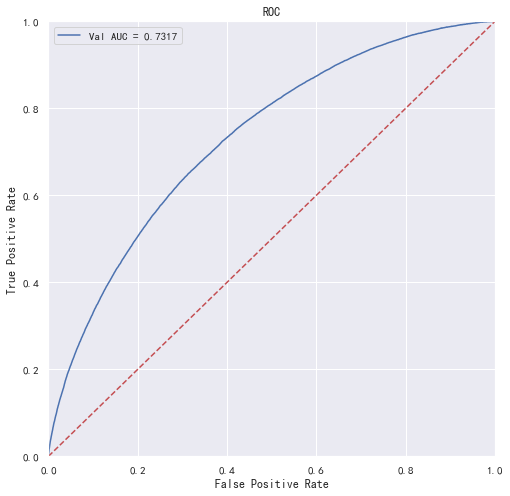

In [19]:
""""""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 14,
                    'max_depth': 19,
                    'min_data_in_leaf': 37,
                    'min_child_weight':1.6,
                    'bagging_fraction': 0.98,
                    'feature_fraction': 0.69,
                    'bagging_freq': 96,
                    'reg_lambda': 9,
                    'reg_alpha': 7,
                    'min_split_gain': 0.4,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
}

"""使用训练集数据进行模型训练"""
final_model_lgb = lgb.train(base_params_lgb, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=13000, verbose_eval=1000, early_stopping_rounds=200)

"""预测并计算roc的相关指标"""
val_pre_lgb = final_model_lgb.predict(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('调参后lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

可以看到相比最早的原始参数，模型的性能还是有提升的

In [20]:
"""保存模型到本地"""
# 保存模型
import pickle
pickle.dump(final_model_lgb, open('dataset/model_lgb_best.pkl', 'wb'))

- **模型调参小总结**

  - 集成模型内置的cv函数可以较快的进行单一参数的调节，一般可以用来优先确定树模型的迭代次数

  - 数据量较大的时候（例如本次项目的数据），网格搜索调参会特别特别慢，不建议尝试

  - 集成模型中原生库和sklearn下的库部分参数不一致，需要注意，具体可以参考xgb和lgb的官方API

> [xgb原生库API](https://xgboost.readthedocs.io/en/stable/parameter.html)，[sklearn库下xgbAPI](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn);
>
> [lgb原生库API](https://lightgbm.readthedocs.io/en/latest/Parameters.html)， [sklearn库下lgbAPI](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)



#### 4.6 经验总结

在本节中，我们主要完成了建模与调参的工作，首先在建模的过程中通过划分数据集、交叉验证等方式对模型的性能进行评估验证，并通过可视化方式绘制模型ROC曲线

最后我们对模型进行调参，这部分介绍了贪心调参、网格搜索调参、贝叶斯调参共三种调参手段，重点使用贝叶斯调参对本次项目进行简单优化，大家在实际操作的过程中可以参考调参思路进行优化，不必拘泥于以上教程所写的具体实例。


----
<br><br>
### END

【 小一 ：Datawhale成员，金融风控爱好者。**个人微信公众号：[知秋小一](https://mp.weixin.qq.com/mp/profile_ext?action=home&__biz=MzI5MjYwNTU5NQ==&scene=124#wechat_redirect)**】

<br><br>



### 关于Datawhale：

> Datawhale是一个专注于数据科学与AI领域的开源组织，汇集了众多领域院校和知名企业的优秀学习者，聚合了一群有开源精神和探索精神的团队成员。Datawhale 以“for the learner，和学习者一起成长”为愿景，鼓励真实地展现自我、开放包容、互信互助、敢于试错和勇于担当。同时 Datawhale 用开源的理念去探索开源内容、开源学习和开源方案，赋能人才培养，助力人才成长，建立起人与人，人与知识，人与企业和人与未来的联结。

本次数据挖掘路径学习，专题知识将在天池分享，详情可关注[Datawhale](https://mp.weixin.qq.com/s/r1qZR-TzWQzJglyHyp9eDA)：

![Datawhale](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279172547/1584432602983_kAxAvgQpG2.jpg)
